<a href="https://colab.research.google.com/github/WardahAsad/ML_Projects_on_Colab/blob/main/Handwritten_Digits_Recognition_using_ANN_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MNIST Handwritten Digits Dataset - Tasks**

1. Load the MNIST dataset and normalize the pixel values to the range 0-1.
2. Reshape the 28x28 images into a 1D vector of size 784 for ANN compatibility.
3. Build a simple ANN model with:
   - An input layer with 784 neurons.
   - One hidden layer with 128 neurons and ReLU activation.
   - An output layer with 10 neurons and softmax activation.
4. Compile the model using the Adam optimizer, sparse categorical crossentropy as the loss function, and accuracy as a metric.
5. Train the model on the training data for 10 epochs with a batch size of 32.
6. Evaluate the model on the test dataset and report the test accuracy.
7. Use the trained model to predict the classes for 5 random test samples and display the images with their predicted and actual labels.
8. Calculate precision, recall, and F1-score for each class using the test dataset and include these metrics in the evaluation report.
9. Save the trained model to a file and reload it for predictions on new data.

In [2]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [3]:
# Reshape 28x28 images to 1D vector of 784 elements
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))


In [4]:
# 2. Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')                     # Output layer with 10 neurons
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
print("Model Summary:")
model.summary()

# 4. Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8792 - loss: 0.4268 - val_accuracy: 0.9603 - val_loss: 0.1368
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9657 - loss: 0.1189 - val_accuracy: 0.9706 - val_loss: 0.0994
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0763 - val_accuracy: 0.9740 - val_loss: 0.0853
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9830 - loss: 0.0554 - val_accuracy: 0.9761 - val_loss: 0.0781
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9873 - loss: 0.0432 - val_accuracy: 0.9771 - val_loss: 0.0793
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9773 - val_loss: 0.0762
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9771 - val_loss: 0.0794
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9934 - loss: 0.0213

In [5]:
# 6. Predict on random test samples
np.random.seed(42)  # For reproducibility
random_indices = np.random.randint(0, X_test.shape[0], 5)
random_samples = X_test[random_indices]
random_labels = y_test[random_indices]

predictions = model.predict(random_samples)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


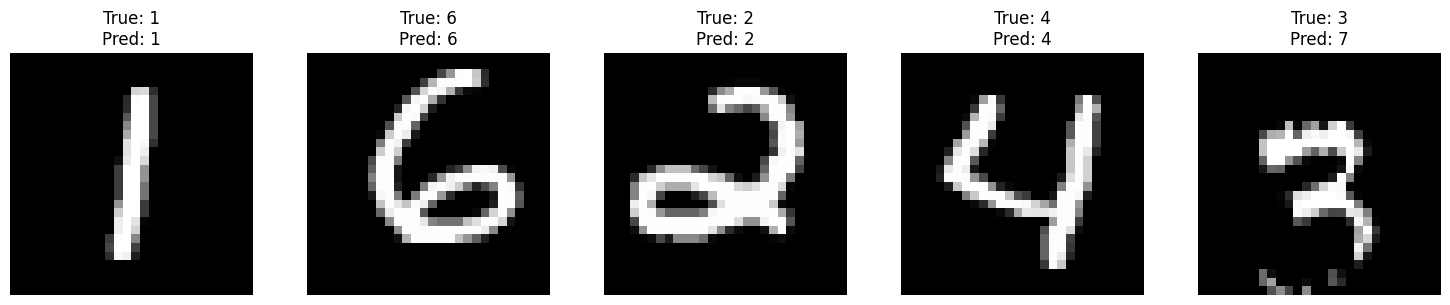

In [6]:
# Display predictions with images
plt.figure(figsize=(15, 3))
for i, (sample, true_label, pred_label) in enumerate(zip(random_samples, random_labels, predicted_labels)):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
# 7. Calculate precision, recall, and F1-score
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate overall metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nOverall Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.95      0.99      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Overall Metrics:
Precision: 0.9789
Recall: 0.9788
F1-Score: 0.9788


In [8]:
# 8. Save and reload the model
model.save('mnist_ann_model.h5')
print("\nModel saved as 'mnist_ann_model.h5'")


Model saved as 'mnist_ann_model.h5'


In [9]:
# Demonstrate loading the model
loaded_model = load_model('mnist_ann_model.h5')
loaded_pred = np.argmax(loaded_model.predict(random_samples), axis=1)
print("\nPredictions from loaded model:", loaded_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Predictions from loaded model: [1 6 2 4 7]


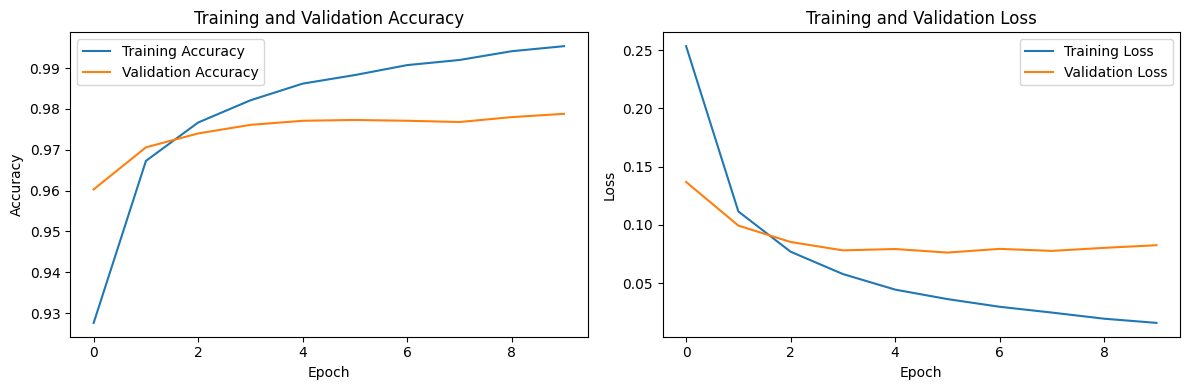

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()